# Project Title : Credit Risk prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Home
2. Intent	
3. Default

## DISCRETE: 
4. Id
5. Age
6. Income
7. Emp_length	
8. Amount
9. Status
10. Cred_length
## Continuoue
11. Rate
12. Percent_income

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
import xgboost as xgb

In [14]:
df=pd.read_csv('credit_risk.csv')

In [15]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [16]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [18]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [19]:
df.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emp_length', ylabel='Density'>

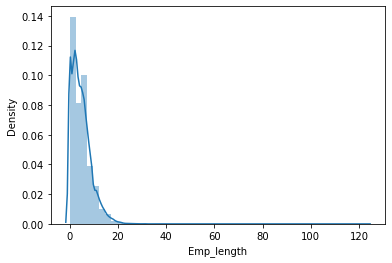

In [20]:
sns.distplot(df['Emp_length'])

In [21]:
med_val=df['Emp_length'].median()


In [22]:
df['Emp_length'].fillna(med_val,inplace=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate', ylabel='Density'>

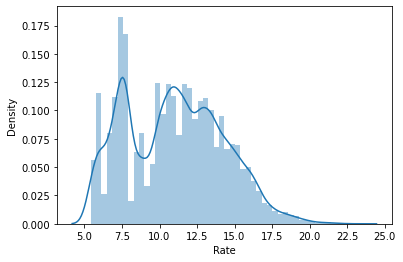

In [23]:
sns.distplot(df['Rate'])

In [24]:
med_val=df['Rate'].median()


In [25]:
df['Rate'].fillna(med_val,inplace=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

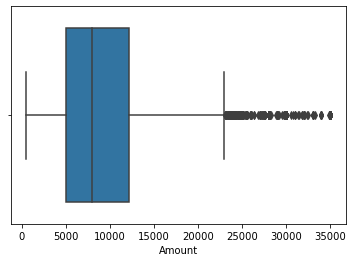

In [26]:
sns.boxplot(df['Amount'])

In [27]:
q1=df['Amount'].quantile(0.25)

In [28]:
q3=df['Amount'].quantile(0.75)

In [29]:
IQR=q3-q1

In [30]:
lower=q1-1.5*IQR

In [31]:
upper=q3+1.5*IQR

In [32]:
df=df[(df['Amount']>lower) & (df['Amount']<upper)]

In [33]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emp_length'>

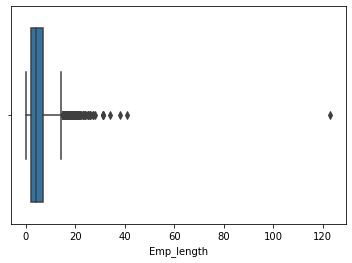

In [34]:
sns.boxplot(df['Emp_length'])

In [35]:
q1=df['Emp_length'].quantile(0.25)

In [36]:
q3=df['Emp_length'].quantile(0.75)

In [37]:
IQR=q3-q1

In [38]:
lower=q1-1.5*IQR

In [39]:
upper=q3+1.5*IQR

In [40]:
df=df[(df['Emp_length']>lower) & (df['Emp_length']<upper)]

In [41]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rate'>

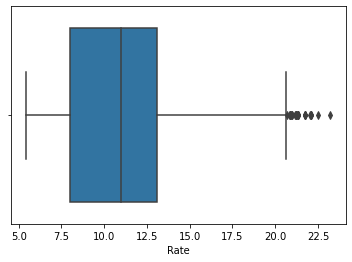

In [42]:
sns.boxplot(df['Rate'])

In [43]:
q1=df['Rate'].quantile(0.25)

In [44]:
q3=df['Rate'].quantile(0.75)

In [45]:
IQR=q3-q1

In [46]:
lower=q1-1.5*IQR

In [47]:
upper=q3+1.5*IQR

In [48]:
df=df[(df['Rate']>lower) & (df['Rate']<upper)]

In [49]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

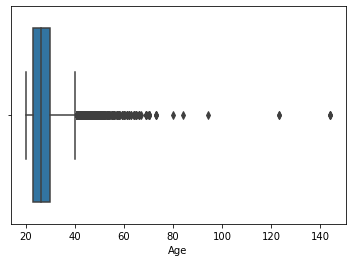

In [50]:
sns.boxplot(df['Age'])

In [51]:
q1=df['Age'].quantile(0.25)

In [52]:
q3=df['Age'].quantile(0.75)

In [53]:
IQR=q3-q1

In [54]:
lower=q1-1.5*IQR

In [55]:
upper=q3+1.5*IQR

In [56]:
df=df[(df['Age']>lower) & (df['Age']<upper)]

In [57]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15
32292,32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,3000,7.68,0,0.01,N,12
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id'>

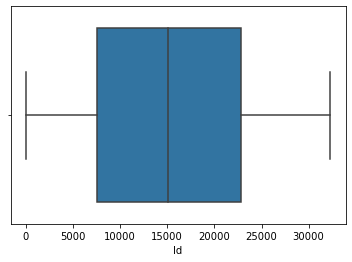

In [58]:
sns.boxplot(df['Id'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

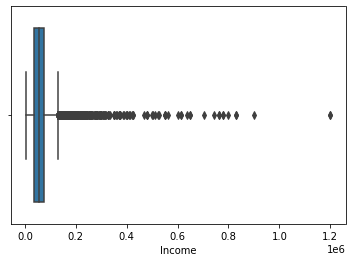

In [59]:
sns.boxplot(df['Income'])

In [60]:
q1=df['Income'].quantile(0.25)

In [61]:
q3=df['Income'].quantile(0.75)

In [62]:
IQR=q3-q1

In [63]:
lower=q1-1.5*IQR

In [64]:
upper=q3+1.5*IQR

In [65]:
df=df[(df['Income']>lower) & (df['Income']<upper)]

In [66]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percent_income'>

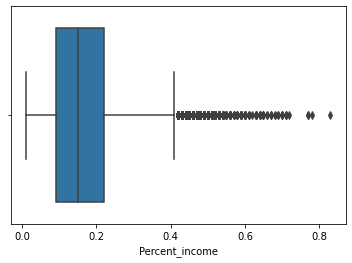

In [67]:
sns.boxplot(df['Percent_income'])

In [68]:
q1=df['Percent_income'].quantile(0.25)

In [69]:
q3=df['Percent_income'].quantile(0.75)

In [70]:
IQR=q3-q1

In [71]:
lower=q1-1.5*IQR

In [72]:
upper=q3+1.5*IQR

In [73]:
df=df[(df['Percent_income']>lower) & (df['Percent_income']<upper)]

In [74]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home', ylabel='count'>

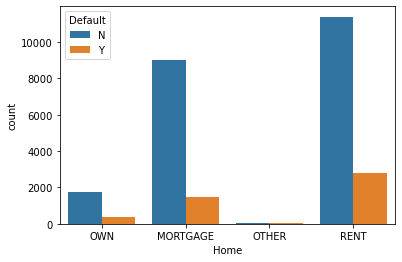

In [75]:
sns.countplot(df['Home'],hue=df['Default'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Intent', ylabel='count'>

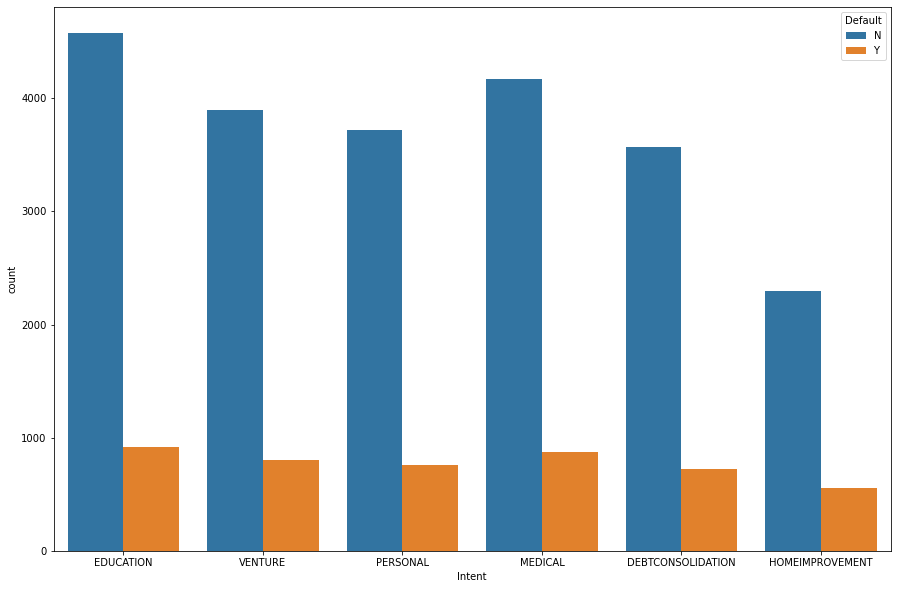

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(df['Intent'],hue=df['Default'])


<AxesSubplot:xlabel='Intent', ylabel='Amount'>

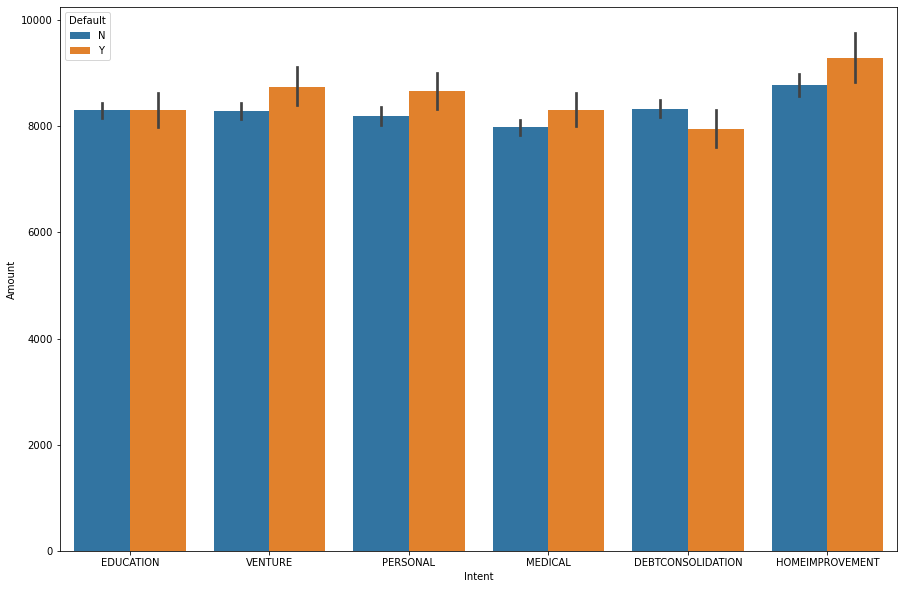

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Intent'],y=df['Amount'],hue=df['Default'])

<AxesSubplot:xlabel='Intent', ylabel='Income'>

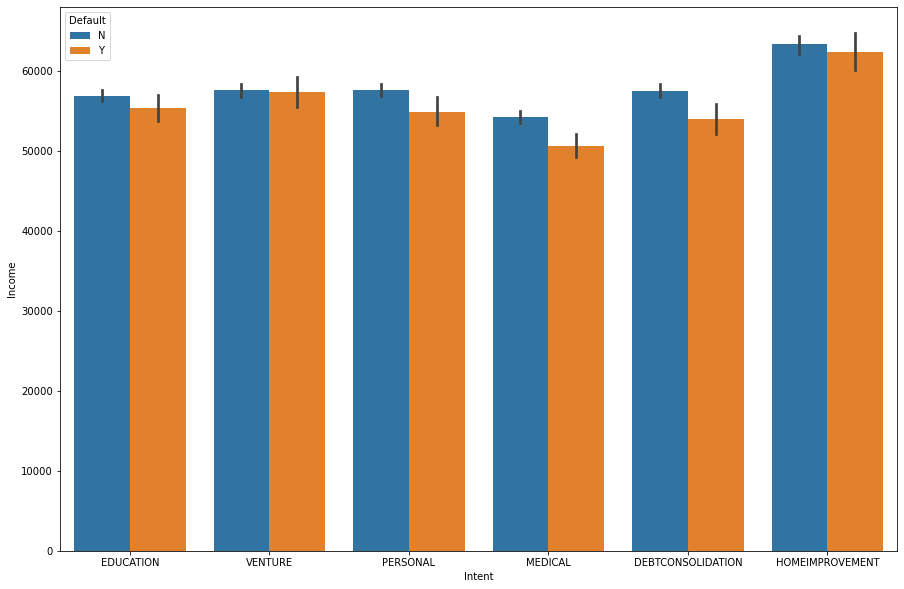

In [78]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Intent'],y=df['Income'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Income'>

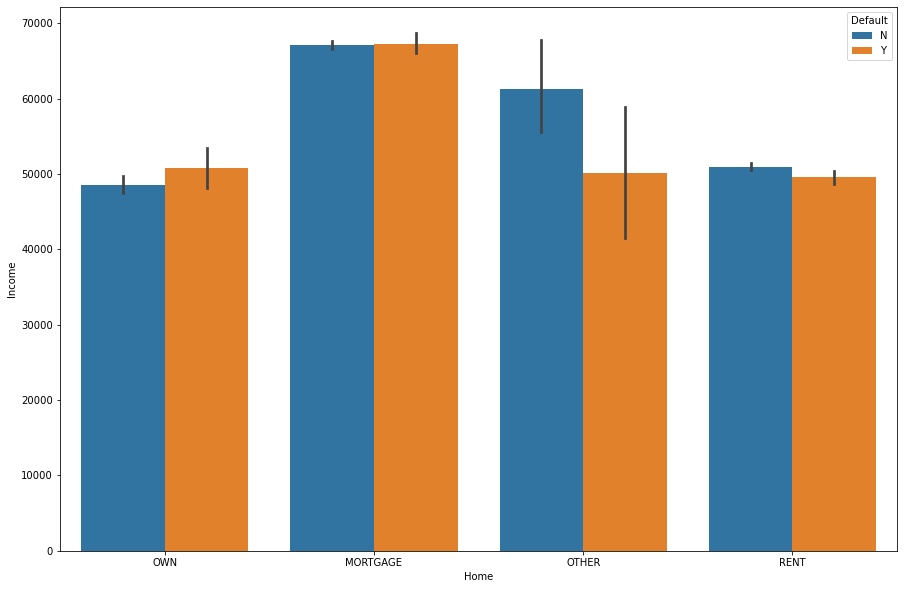

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Home'],y=df['Income'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Amount'>

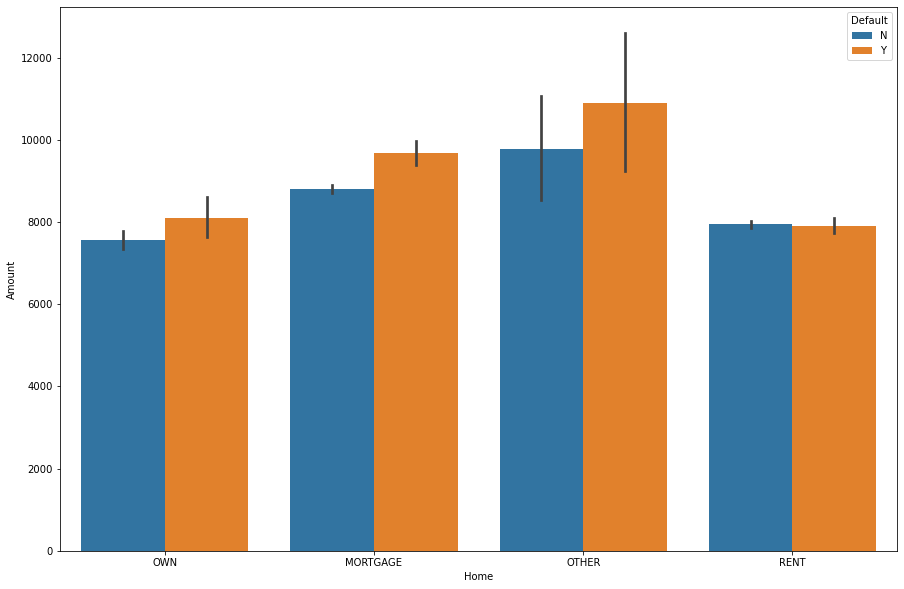

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Home'],y=df['Amount'],hue=df['Default'])

In [81]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13


<AxesSubplot:xlabel='Intent', ylabel='Emp_length'>

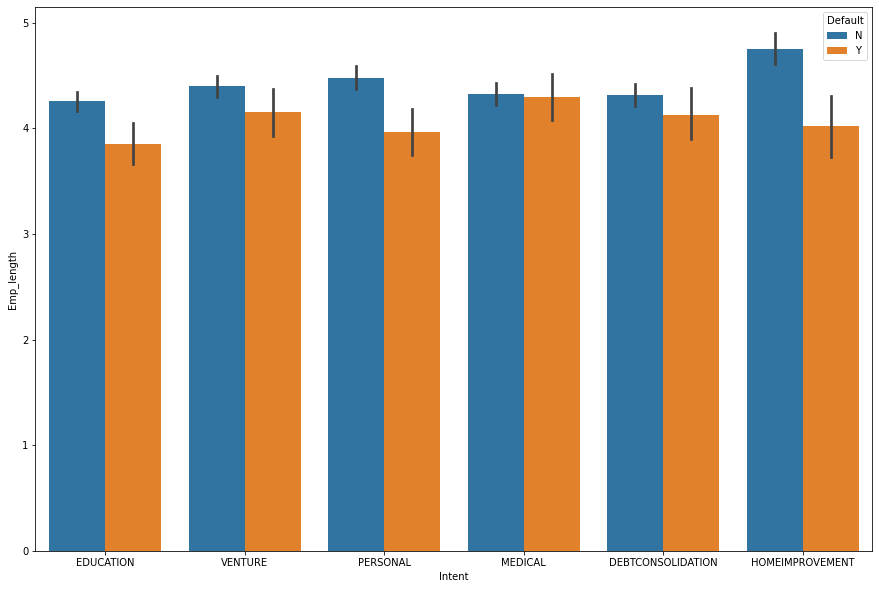

In [82]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Intent'],y=df['Emp_length'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Emp_length'>

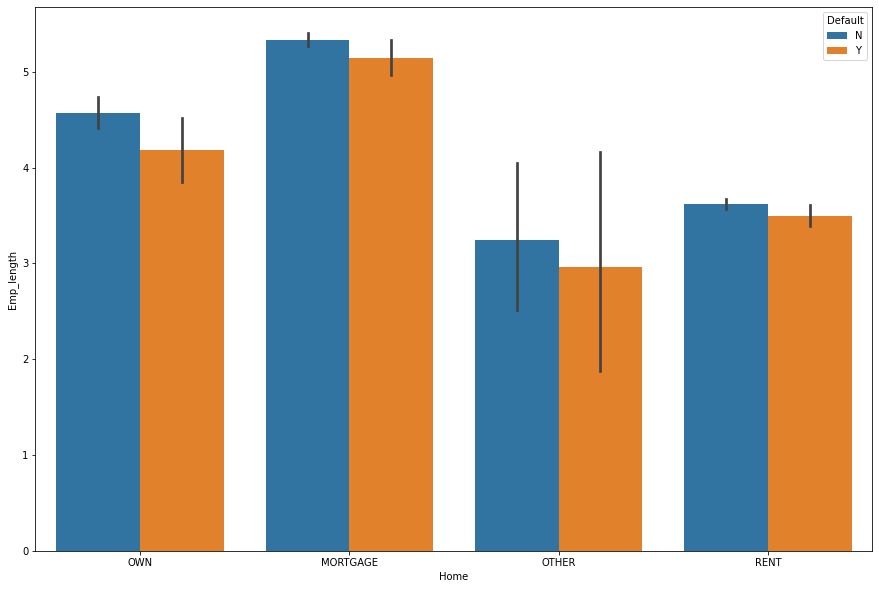

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Home'],y=df['Emp_length'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Percent_income'>

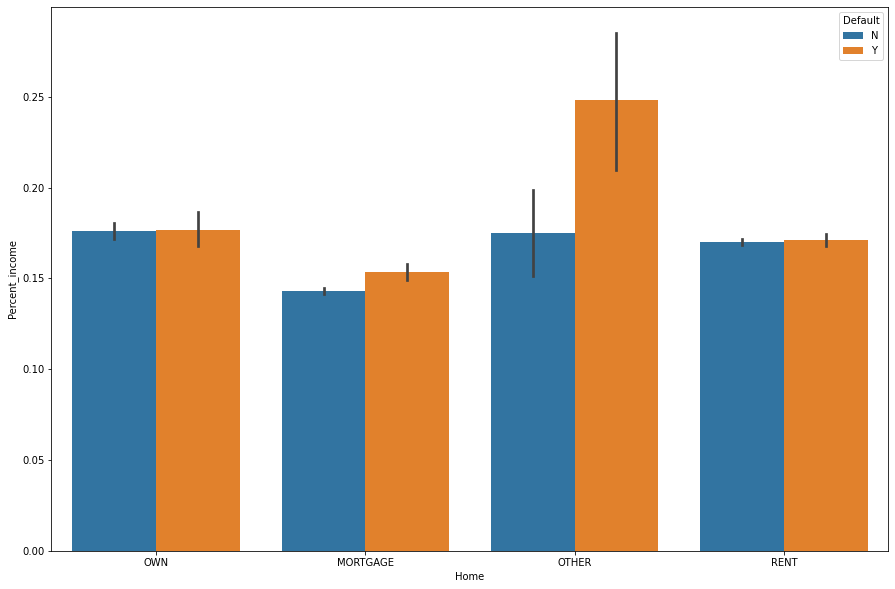

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Home'],y=df['Percent_income'],hue=df['Default'])

<AxesSubplot:xlabel='Intent', ylabel='Percent_income'>

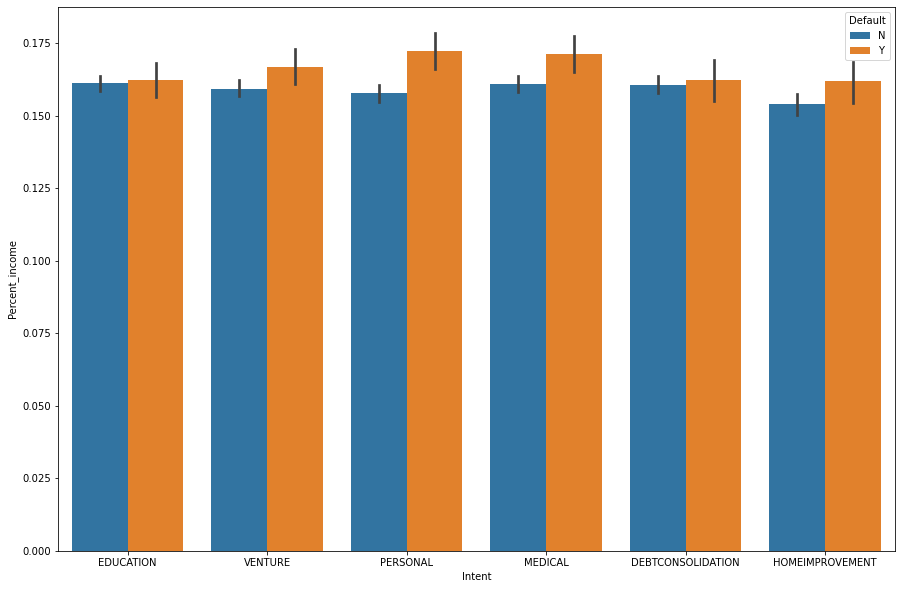

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Intent'],y=df['Percent_income'],hue=df['Default'])

<AxesSubplot:xlabel='Default', ylabel='Rate'>

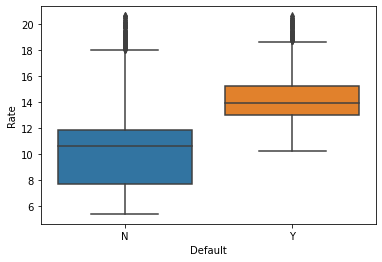

In [86]:
sns.boxplot(x=df['Default'],y=df['Rate'])

In [87]:
df['Age_Range']=pd.qcut(df['Age'],4)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3578406753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Range']=pd.qcut(df['Age'],4)


In [88]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Range
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,"(19.999, 23.0]"
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,"(19.999, 23.0]"
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,"(19.999, 23.0]"
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2,"(23.0, 25.0]"
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3,"(23.0, 25.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15,"(29.0, 40.0]"
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15,"(29.0, 40.0]"
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15,"(29.0, 40.0]"
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13,"(29.0, 40.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='Income'>

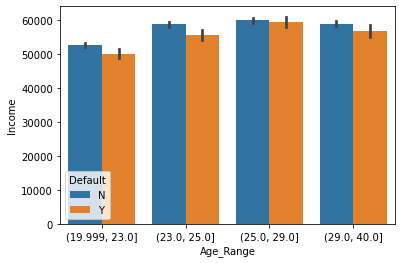

In [89]:
sns.barplot(x=df['Age_Range'],y=df['Income'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Amount'>

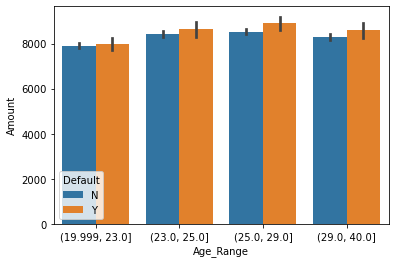

In [90]:
sns.barplot(x=df['Age_Range'],y=df['Amount'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Emp_length'>

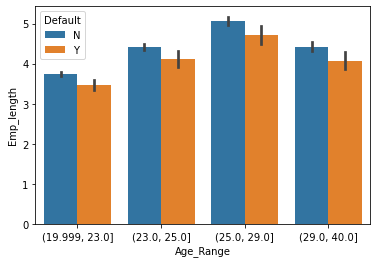

In [91]:
sns.barplot(x=df['Age_Range'],y=df['Emp_length'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Percent_income'>

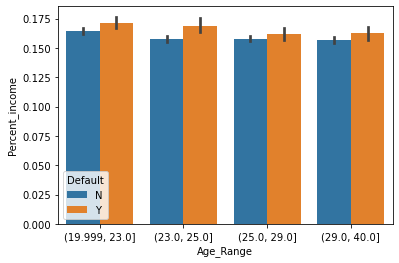

In [92]:
sns.barplot(x=df['Age_Range'],y=df['Percent_income'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Cred_length'>

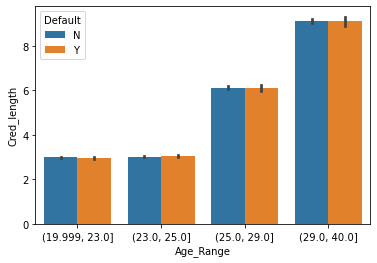

In [93]:
sns.barplot(x=df['Age_Range'],y=df['Cred_length'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Income'>

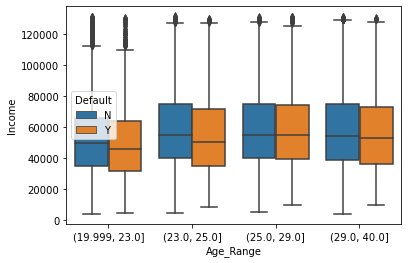

In [94]:
sns.boxplot(x=df['Age_Range'],y=df['Income'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Emp_length'>

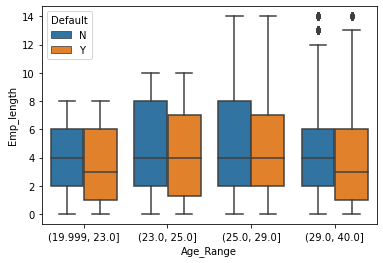

In [95]:
sns.boxplot(x=df['Age_Range'],y=df['Emp_length'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Rate'>

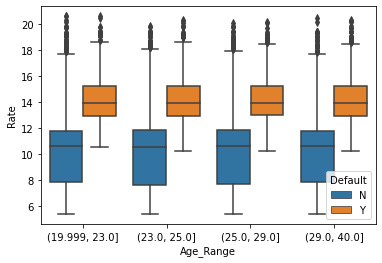

In [96]:
sns.boxplot(x=df['Age_Range'],y=df['Rate'],hue=df['Default'])

<AxesSubplot:xlabel='Age_Range', ylabel='Amount'>

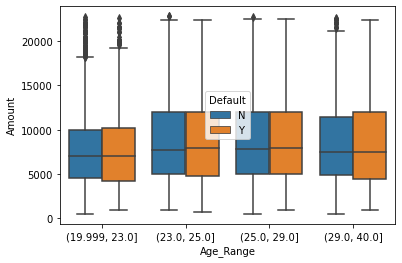

In [97]:
sns.boxplot(x=df['Age_Range'],y=df['Amount'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Amount'>

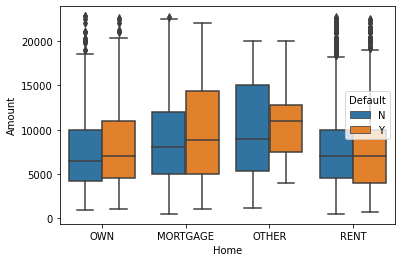

In [98]:
sns.boxplot(x=df['Home'],y=df['Amount'],hue=df['Default'])

<AxesSubplot:xlabel='Home', ylabel='Rate'>

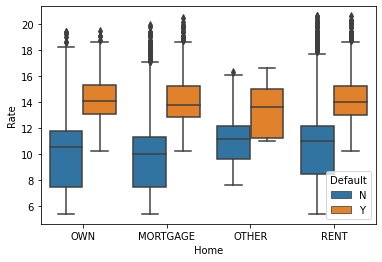

In [99]:
sns.boxplot(x=df['Home'],y=df['Rate'],hue=df['Default'])

In [100]:
df['Income_Range']=pd.qcut(df['Income'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\1159022786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_Range']=pd.qcut(df['Income'],4)


In [101]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Range,Income_Range
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,"(19.999, 23.0]","(4079.999, 37500.0]"
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2,"(23.0, 25.0]","(4079.999, 37500.0]"
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3,"(23.0, 25.0]","(4079.999, 37500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15,"(29.0, 40.0]","(37500.0, 53000.0]"
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15,"(29.0, 40.0]","(4079.999, 37500.0]"
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15,"(29.0, 40.0]","(72000.0, 131400.0]"
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13,"(29.0, 40.0]","(72000.0, 131400.0]"


<AxesSubplot:xlabel='Income_Range', ylabel='Amount'>

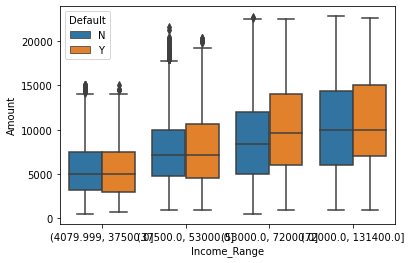

In [102]:
sns.boxplot(x=df['Income_Range'],y=df['Amount'],hue=df['Default'])

<AxesSubplot:xlabel='Income_Range', ylabel='Emp_length'>

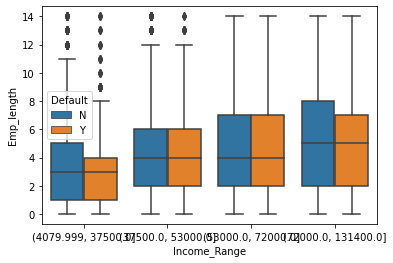

In [103]:
sns.boxplot(x=df['Income_Range'],y=df['Emp_length'],hue=df['Default'])

<AxesSubplot:xlabel='Income_Range', ylabel='Rate'>

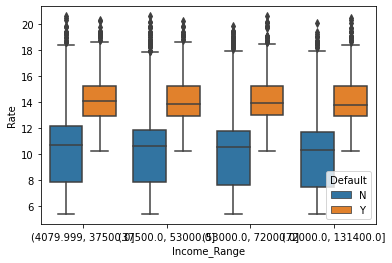

In [104]:
sns.boxplot(x=df['Income_Range'],y=df['Rate'],hue=df['Default'])

<AxesSubplot:xlabel='Income_Range', ylabel='Cred_length'>

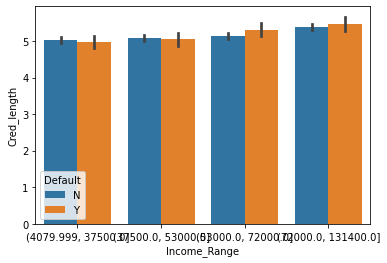

In [105]:
sns.barplot(x=df['Income_Range'],y=df['Cred_length'],hue=df['Default'])

In [106]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Range,Income_Range
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,"(19.999, 23.0]","(4079.999, 37500.0]"
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2,"(23.0, 25.0]","(4079.999, 37500.0]"
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3,"(23.0, 25.0]","(4079.999, 37500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15,"(29.0, 40.0]","(37500.0, 53000.0]"
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15,"(29.0, 40.0]","(4079.999, 37500.0]"
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15,"(29.0, 40.0]","(72000.0, 131400.0]"
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13,"(29.0, 40.0]","(72000.0, 131400.0]"


In [107]:
label_df=df.groupby(['Age_Range','Default'])['Income'].mean().sort_values(ascending=False).index


In [108]:
val_df=df.groupby(['Age_Range','Default'])['Income'].mean().sort_values(ascending=False).values


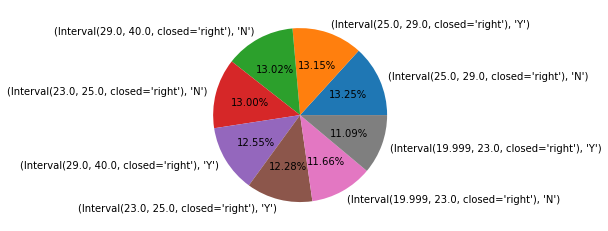

In [109]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [110]:
label_df=df.groupby(['Age_Range','Default'])['Amount'].mean().sort_values(ascending=False).index


In [111]:
val_df=df.groupby(['Age_Range','Default'])['Amount'].mean().sort_values(ascending=False).values


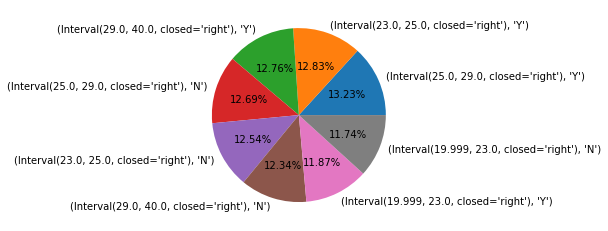

In [112]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [113]:
label_df=df.groupby(['Intent','Default'])['Amount'].mean().sort_values(ascending=False).index


In [114]:
val_df=df.groupby(['Intent','Default'])['Amount'].mean().sort_values(ascending=False).values


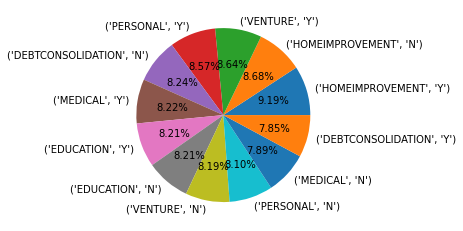

In [115]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [116]:
label_df=df.groupby(['Intent','Default'])['Income'].mean().sort_values(ascending=False).index


In [117]:
val_df=df.groupby(['Intent','Default'])['Income'].mean().sort_values(ascending=False).values


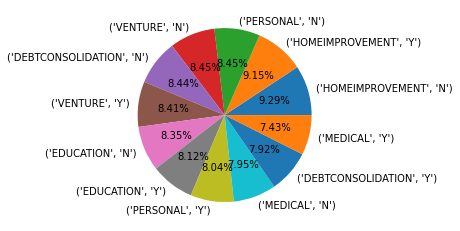

In [118]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [119]:
label_df=df.groupby(['Home','Default'])['Amount'].mean().sort_values(ascending=False).index


In [120]:
val_df=df.groupby(['Home','Default'])['Amount'].mean().sort_values(ascending=False).values


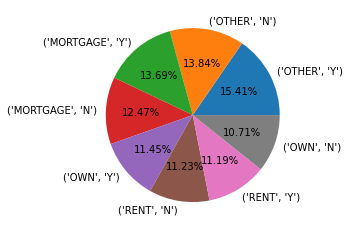

In [121]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [122]:
label_df=df.groupby(['Age_Range','Intent'])['Amount'].mean().sort_values(ascending=False).index


In [123]:
val_df=df.groupby(['Age_Range','Intent'])['Amount'].mean().sort_values(ascending=False).values


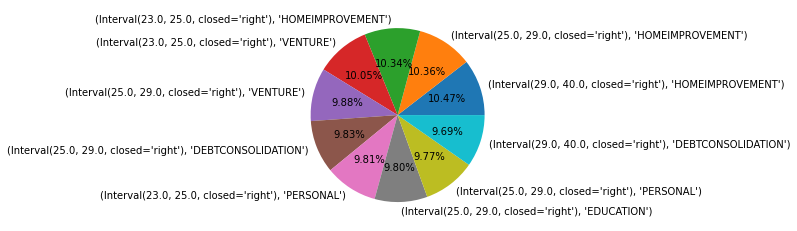

In [124]:
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [125]:
label_df=df.groupby(['Age_Range','Intent'])['Rate'].mean().sort_values(ascending=False).index


In [126]:
val_df=df.groupby(['Age_Range','Intent'])['Rate'].mean().sort_values(ascending=False).values


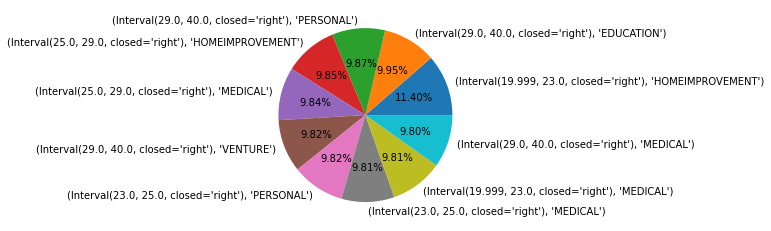

In [127]:
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [128]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Range,Income_Range
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,"(19.999, 23.0]","(4079.999, 37500.0]"
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,"(19.999, 23.0]","(4079.999, 37500.0]"
19,19,24,10800,MORTGAGE,8.0,EDUCATION,1750,10.99,1,0.16,N,2,"(23.0, 25.0]","(4079.999, 37500.0]"
23,23,24,10980,OWN,0.0,PERSONAL,1500,7.29,0,0.14,N,3,"(23.0, 25.0]","(4079.999, 37500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,8000,17.49,1,0.18,N,15,"(29.0, 40.0]","(37500.0, 53000.0]"
32289,32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,1000,10.99,0,0.03,N,15,"(29.0, 40.0]","(4079.999, 37500.0]"
32290,32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,4000,6.62,0,0.04,N,15,"(29.0, 40.0]","(72000.0, 131400.0]"
32293,32293,38,110000,MORTGAGE,5.0,MEDICAL,16000,11.99,0,0.15,N,13,"(29.0, 40.0]","(72000.0, 131400.0]"


In [129]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,26855.000000,26855.000000,26855.000000,26855.000000,26855.000000,26855.000000,26855.000000,26855.000000,26855.000000
mean,15121.215118,26.533532,56993.428747,4.334686,8312.413889,10.912086,0.202830,0.160601,5.159300
std,8846.956792,4.400381,25664.153309,3.322211,4800.277218,3.030206,0.402114,0.089804,3.249709
min,1.000000,20.000000,4080.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,7421.500000,23.000000,37500.000000,2.000000,4800.000000,8.000000,0.000000,0.090000,3.000000
50%,14539.000000,25.000000,53000.000000,4.000000,7500.000000,10.990000,0.000000,0.150000,4.000000
75%,22660.500000,29.000000,72000.000000,6.000000,11200.000000,13.060000,0.000000,0.220000,7.000000
max,32296.000000,40.000000,131400.000000,14.000000,22800.000000,20.620000,1.000000,0.410000,17.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emp_length', ylabel='Density'>

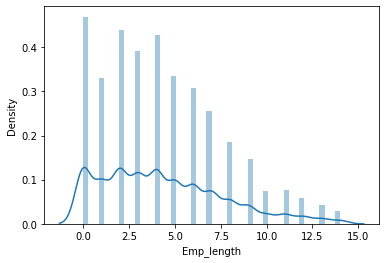

In [130]:
sns.distplot(df['Emp_length'])

In [131]:
df['Emp_length']=np.log(df['Emp_length'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\1351802033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emp_length']=np.log(df['Emp_length'])


In [132]:
df=df[df['Emp_length']>0]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emp_length', ylabel='Density'>

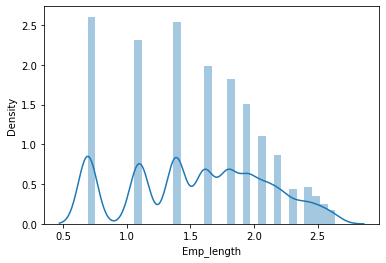

In [133]:
sns.distplot(df['Emp_length'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

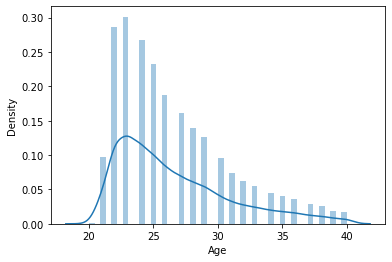

In [134]:
sns.distplot(df['Age'])

In [135]:
df['Age']=np.log(df['Age'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3964567383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=np.log(df['Age'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

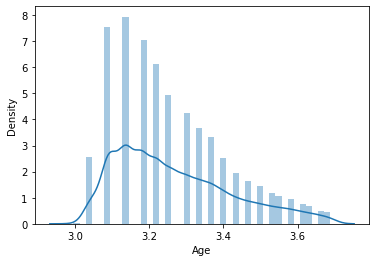

In [136]:
sns.distplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

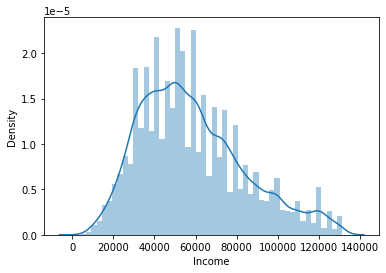

In [137]:
sns.distplot(df['Income'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

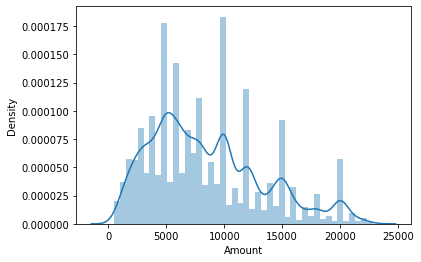

In [138]:
sns.distplot(df['Amount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate', ylabel='Density'>

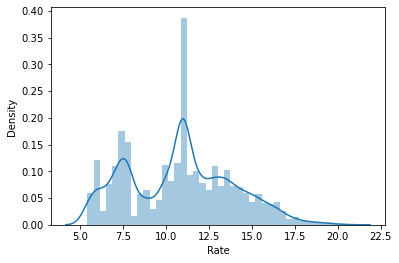

In [139]:
sns.distplot(df['Rate'])

In [140]:
df['Rate']=np.log(df['Rate'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3864920053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate']=np.log(df['Rate'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate', ylabel='Density'>

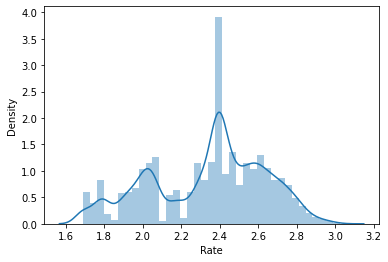

In [141]:
sns.distplot(df['Rate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cred_length', ylabel='Density'>

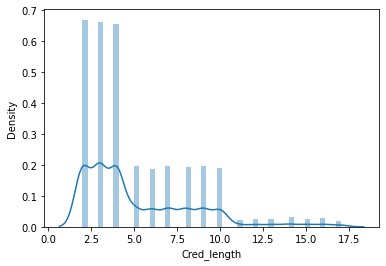

In [142]:
sns.distplot(df['Cred_length'])

In [143]:
df['Cred_length']=np.log(df['Cred_length'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3586388364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cred_length']=np.log(df['Cred_length'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cred_length', ylabel='Density'>

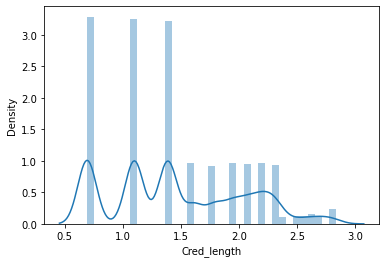

In [144]:
sns.distplot(df['Cred_length'])

In [145]:
le=LabelEncoder()


In [146]:
df['Home']=le.fit_transform(df['Home'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3585404498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home']=le.fit_transform(df['Home'])


In [147]:
df['Intent']=le.fit_transform(df['Intent'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\3668962295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intent']=le.fit_transform(df['Intent'])


In [148]:
df['Default']=le.fit_transform(df['Default'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\4110847459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Default']=le.fit_transform(df['Default'])


In [149]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Range,Income_Range
1,1,3.044522,9600,2,1.609438,1,1000,2.410542,0,0.10,0,0.693147,"(19.999, 23.0]","(4079.999, 37500.0]"
5,5,3.044522,9900,2,0.693147,5,2500,1.965713,1,0.25,0,0.693147,"(19.999, 23.0]","(4079.999, 37500.0]"
9,9,3.044522,10000,2,1.791759,5,1600,2.690565,1,0.16,0,1.098612,"(19.999, 23.0]","(4079.999, 37500.0]"
19,19,3.178054,10800,0,2.079442,1,1750,2.396986,1,0.16,0,0.693147,"(23.0, 25.0]","(4079.999, 37500.0]"
29,29,3.044522,11389,1,1.609438,1,4000,2.552565,1,0.35,1,0.693147,"(19.999, 23.0]","(4079.999, 37500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,3.583519,44000,3,1.386294,0,8000,2.861629,1,0.18,0,2.708050,"(29.0, 40.0]","(37500.0, 53000.0]"
32289,32289,3.688879,33000,0,0.693147,2,1000,2.396986,0,0.03,0,2.708050,"(29.0, 40.0]","(4079.999, 37500.0]"
32290,32290,3.610918,90000,0,2.397895,0,4000,1.890095,0,0.04,0,2.708050,"(29.0, 40.0]","(72000.0, 131400.0]"
32293,32293,3.637586,110000,0,1.609438,3,16000,2.484073,0,0.15,0,2.564949,"(29.0, 40.0]","(72000.0, 131400.0]"


In [150]:
df.drop(['Age_Range','Income_Range'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_22128\1424669246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Age_Range','Income_Range'],axis=1,inplace=True)


In [151]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,1,3.044522,9600,2,1.609438,1,1000,2.410542,0,0.10,0,0.693147
5,5,3.044522,9900,2,0.693147,5,2500,1.965713,1,0.25,0,0.693147
9,9,3.044522,10000,2,1.791759,5,1600,2.690565,1,0.16,0,1.098612
19,19,3.178054,10800,0,2.079442,1,1750,2.396986,1,0.16,0,0.693147
29,29,3.044522,11389,1,1.609438,1,4000,2.552565,1,0.35,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,32287,3.583519,44000,3,1.386294,0,8000,2.861629,1,0.18,0,2.708050
32289,32289,3.688879,33000,0,0.693147,2,1000,2.396986,0,0.03,0,2.708050
32290,32290,3.610918,90000,0,2.397895,0,4000,1.890095,0,0.04,0,2.708050
32293,32293,3.637586,110000,0,1.609438,3,16000,2.484073,0,0.15,0,2.564949


In [152]:
y=df['Default']

In [153]:
X=df.drop('Default',axis=1)

In [154]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [155]:
X_train

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length
15285,15285,3.218876,129996,0,2.197225,5,7500,2.473171,0,0.06,1.098612
22717,22717,3.433987,60000,3,1.098612,0,7500,1.756132,0,0.13,2.197225
22660,22660,3.332205,36000,3,0.693147,2,7500,2.340844,1,0.21,2.197225
14292,14292,3.218876,85000,3,1.609438,1,14400,2.138889,0,0.17,0.693147
10189,10189,3.178054,65544,2,1.386294,1,5000,2.373975,0,0.08,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
16179,16179,3.178054,72000,3,1.609438,2,8000,2.302585,0,0.11,0.693147
17170,17170,3.218876,49200,0,1.791759,3,5600,2.013569,0,0.11,1.098612
7908,7908,3.091042,41500,3,1.098612,5,7000,2.753661,1,0.17,1.098612
1737,1737,3.044522,13200,3,0.693147,0,1875,1.944481,0,0.14,1.098612


In [156]:
rfc=RandomForestClassifier()


In [157]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
y_pred=rfc.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred)

0.8425725941924646

In [160]:
confusion_matrix(y_test,y_pred)

array([[3246,  256],
       [ 400,  265]], dtype=int64)

In [161]:
lr=LogisticRegression()


In [162]:
lr.fit(X_train,y_train)

LogisticRegression()

In [163]:
y_pred=lr.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred)

0.8404127669786418

In [165]:
confusion_matrix(y_test,y_pred)

array([[3502,    0],
       [ 665,    0]], dtype=int64)

In [166]:
knc=KNeighborsClassifier()


In [167]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [168]:
y_pred=knc.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred)

0.8180945524358051

In [170]:
confusion_matrix(y_test,y_pred)

array([[3383,  119],
       [ 639,   26]], dtype=int64)

In [171]:
dtc=DecisionTreeClassifier()


In [172]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [173]:
y_pred=dtc.predict(X_test)

In [174]:
accuracy_score(y_test,y_pred)

0.8231341492680585

In [175]:
confusion_matrix(y_test,y_pred)

array([[3117,  385],
       [ 352,  313]], dtype=int64)

In [176]:
xgb_i=xgb.XGBClassifier()

In [177]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
y_pred=xgb_i.predict(X_test)

In [179]:
accuracy_score(y_test,y_pred)

0.8389728821694264

In [180]:
confusion_matrix(y_test,y_pred)

array([[3188,  314],
       [ 357,  308]], dtype=int64)